In [33]:
import pandas as pd
import numpy as np
from utils import utility
from utils.encoder import OneHotEncoder, ThermometerEncoder, IntegerEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import classification_report
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
df = pd.read_csv('credit-g_csv.csv')
df = df.dropna()

In [35]:
# df.to_csv('clean_dataset\credit-g_csv\credit-g_csv.csv', index=False)

In [36]:
nominal_features = ['credit_history', 'purpose', 'personal_status', 'other_parties', 'other_payment_plans', 'own_telephone', 'foreign_worker']
ordinal_features = ['checking_status', 'savings_status', 'employment', 'property_magnitude', 'housing', 'job']

label = ['class']
other_features = list(set(df.columns) - (set(nominal_features + ordinal_features + label)))

ordinal_features_plus = ['checking_status']
ordinal_features_plus = ordinal_features
# # ordinal_features = ['savings_status', 'employment', 'housing']
# ordinal_features = ['checking_status', 'property_magnitude', 'job']

In [37]:
df[other_features]

,age,credit_amount,duration,existing_credits,residence_since,num_dependents,installment_commitment
0,67,1169,6,2,4,1,4
1,22,5951,48,1,2,1,2
2,49,2096,12,1,3,2,2
3,45,7882,42,1,4,2,2
4,53,4870,24,2,4,2,3
...,...,...,...,...,...,...,...
995,31,1736,12,1,4,1,3
996,40,3857,30,1,4,1,4
997,38,804,12,1,4,1,4
998,23,1845,45,1,4,1,4


In [38]:
unique_dic = utility.df_to_dict(df)
other_dic = {k: unique_dic[k] for k in other_features}
nominal_dic = {k: unique_dic[k] for k in nominal_features}
label_dic = {k: unique_dic[k] for k in label}
ordinal_dic = {
    'checking_status': ['no checking', '<0', '0<=X<200', '>=200'],
    'savings_status': ['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000',],
    'employment': ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'],
    'property_magnitude': ['no known property', 'life insurance', 'car', 'real estate'],
    'housing': ['for free', 'rent', 'own'],
    'job': ['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt']
}
ordinal_dic_plus = {key: ordinal_dic[key] for key in ordinal_features_plus}
other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
other_num + nom_num + ord_num, other_num + nom_num + len(ordinal_dic)


(61, 42)

In [39]:
ord = IntegerEncoder(ordinal_dic)
nom = IntegerEncoder(nominal_dic)
tar = IntegerEncoder(label_dic)

def encode_df(data, encoder, features):
    df = data.copy()
    encoding = utility.concat(encoder(df[features]))
    for i, key in enumerate(features):
        df[key] = encoding[:, i]
    return df

encoded_df = encode_df(df, ord, ordinal_features)
encoded_df = encode_df(encoded_df, nom, nominal_features)
encoded_df = encode_df(encoded_df, tar, label)

Text(0.5, 1.0, 'UCI German Credit')

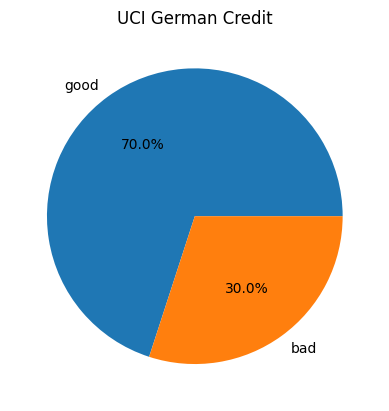

In [40]:
labels = list(label_dic.values())[0]
sizes = [len(df[df['class'] == val]) for val in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('UCI German Credit')

In [41]:
label_dic

{'class': array(['good', 'bad'], dtype=object)}

In [42]:
# import random
# from sklearn.model_selection import KFold
# k=10
# regr = LogisticRegression(max_iter=1000)
# test_pred_res, test_true_res = [], []
# train_pred_res, train_true_res = [], []
# sc = StandardScaler()
# kf = KFold(k)   
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# for train_index, test_index in kf.split(df):
#     X_train, y_train, X_test, y_test = X.iloc[train_index], pd.DataFrame(y.iloc[train_index]), X.iloc[test_index], pd.DataFrame(y.iloc[test_index])
#     # random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], ThermometerEncoder, ordinal_dic_plus)
#     nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], OneHotEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], ThermometerEncoder, ordinal_dic)
#     other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     sc.fit(other_train)
#     other_train, other_test = sc.transform(other_train), sc.transform(other_test)
#     y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     # X_train_all, X_test_all = ordinal_train, ordinal_test
#     X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred_test = regr.predict(X_test_all)
#     y_pred_train = regr.predict(X_train_all)
#     test_true_res = test_true_res+ [np.squeeze(y_test)] if len(test_true_res)> 0 else [np.squeeze(y_test)]
#     test_pred_res = test_pred_res+ [np.squeeze(y_pred_test)] if len(test_pred_res)> 0 else [np.squeeze(y_pred_test)]
#     train_true_res = train_true_res+ [np.squeeze(y_train)] if len(train_true_res)> 0 else [np.squeeze(y_train)]
#     train_pred_res = train_pred_res+ [np.squeeze(y_pred_train)] if len(train_pred_res)> 0 else [np.squeeze(y_pred_train)]

# test_temp_res, train_temp_res = [], []
# for i in range(k):
#     test_temp_res.append(classification_report(test_true_res[i], test_pred_res[i], output_dict=True)) 
#     train_temp_res.append(classification_report(train_true_res[i], train_pred_res[i], output_dict=True)) 
# clf_rep_dic_test, clf_rep_dic_train = utility.concat_dic(*test_temp_res), utility.concat_dic(*train_temp_res)
# test_res, train_res = utility.mean_std_dic(clf_rep_dic_test), utility.mean_std_dic(clf_rep_dic_train)

In [43]:
# train_res['accuracy'], test_res['accuracy']

In [44]:
# import random
# k=10
# test_size = 0.25
# sc = StandardScaler()
# regr = LogisticRegression(max_iter=1000)
# temp_pred_res, temp_true_res = np.array([]), np.array([])
# random.seed(0)
# for _ in range(k):
#     X_train, y_train, X_test, y_test = utility.split_dataset(df, test_size, random)
#     #to test whether adding subset of ordinal features with different encodings(thermometer or one-hot) imporves performance 
#     random_train, random_test, _ = utility.encoding_pipeline(X_train[ordinal_features_plus], X_test[ordinal_features_plus], OneHotEncoder, ordinal_dic_plus)
#     nominal_train, nominal_test, _ = utility.encoding_pipeline(X_train[nominal_features], X_test[nominal_features], IntegerEncoder, nominal_dic)
#     ordinal_train, ordinal_test, _ = utility.encoding_pipeline(X_train[ordinal_features], X_test[ordinal_features], IntegerEncoder, ordinal_dic)
#     other_train, other_test = np.array(X_train[other_features].values), np.array(X_test[other_features].values)
#     y_train, y_test, _ = utility.encoding_pipeline(y_train, y_test, IntegerEncoder, label_dic)
#     sc.fit(other_train)
#     other_train, other_test = sc.transform(other_train), sc.transform(other_test)
    
#     # to test whether adding repeated features improves performance
#     # t=1
#     # random_train, random_test = [nominal_train for _ in range(t)], [nominal_test for _ in range(t)]
#     X_train_all, X_test_all = np.concatenate([other_train, nominal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, random_test], axis=1)
#     # X_train_all, X_test_all = np.concatenate([other_train, nominal_train, ordinal_train, random_train], axis=1), np.concatenate([other_test, nominal_test, ordinal_test, random_test], axis=1)
#     regr.fit(X_train_all, y_train)
#     y_pred = regr.predict(X_test_all)
#     temp_true_res = np.concatenate([temp_true_res, y_test]) if temp_true_res.size > 0 else y_test
#     temp_pred_res = np.concatenate([temp_pred_res, y_pred]) if temp_pred_res.size > 0 else y_pred


# clf_rep_dic = classification_report(temp_true_res, temp_pred_res, output_dict=True)
     

In [45]:
res, models, res_train = utility.k_fold_validation(k=10, 
                  df=df, 
                  encoders=[OneHotEncoder, ThermometerEncoder, IntegerEncoder],  
                  pred_task=
                    {
                      'name': 'classification',
                      'model': LogisticRegression(C=10, max_iter=1000),
                      'metric': {'clf_rep': lambda y_true, y_pred: classification_report(y_true, y_pred, output_dict=True)}
                    }, 
                  features=
                    {
                      'ordinal': {
                        'name': ordinal_features,
                        'dict': ordinal_dic
                      },
                      'nominal': {
                        'name': nominal_features,
                        'dict': nominal_dic
                      },
                      'numerical': other_features,
                      'label': label_dic
                    },
                    return_model=True,
                    train_result=True)

c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\wmarc\anaconda3\envs\bthesis\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

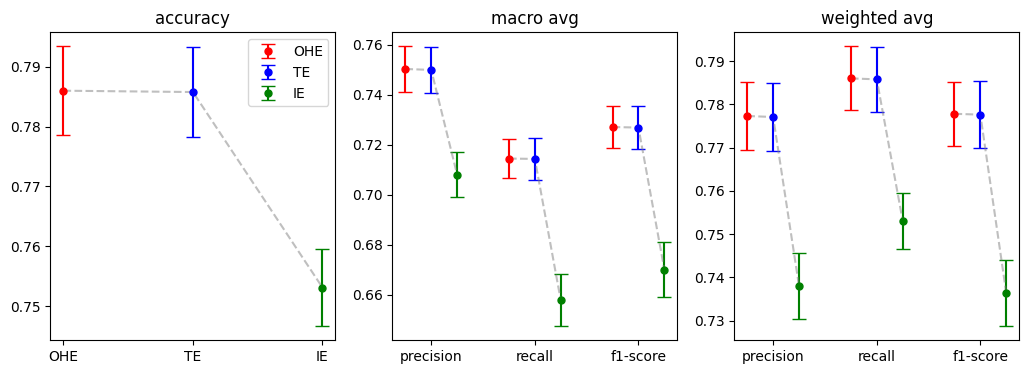

In [46]:
import matplotlib.pyplot as plt

import math
def deep_copy(dic):
    dic_res = {}
    for key, val in dic.items():
        dic_res[key] = deep_copy(val) if isinstance(val, dict) else val
    return dic_res
def round_decimal_places(df, d):
    dec = math.pow(10,d)
    df_copy = df.copy()
    df_copy = df_copy.map(lambda x: (math.ceil(x[0]*dec)/dec, math.ceil(x[1]*dec)/dec))
    return df_copy
res_temp = res_train
res_copy = deep_copy(res_temp)
d = 12
for encoder in res.keys():
    res_copy[encoder]['clf_rep']['accuracy'] = {key: res_temp[encoder]['clf_rep']['accuracy'] for key in res_copy[encoder]['clf_rep']['macro avg'].keys()}
# df_lists = [pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns") for key in res_copy.keys()]
df_lists = [round_decimal_places(pd.DataFrame(res_copy[key.__str__()]['clf_rep']).rename_axis(key.__str__(), axis="columns").drop(index='support'), d) for key in res_copy.keys()]

plot_dic = {}
metrics = ['accuracy','macro avg', 'weighted avg']
inner_metrics = ['precision', 'recall', 'f1-score']

plot_dic = {}
for key in metrics:
    plot_dic[key] = {k: [] for k in inner_metrics}
    for key2 in inner_metrics:
        for dfs in df_lists:
            df_dict = dfs.to_dict()
            plot_dic[key][key2].append(list(df_dict[key][key2]))
            
            
modss = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
model_names = ['OHE', 'TE', 'IE']
colors = ['r', 'b', 'g']
x_axis_placement = np.array([-0.25, 0, 0.25])
fig, ax = plt.subplots(1, 3, figsize=(12.5,4))
ax = ax.ravel()
for i, (key, val) in enumerate(plot_dic.items()):
    if key == 'accuracy':
        accs = np.array(val['precision'])
        ax[i].errorbar(range(len(accs)), accs[:,0], accs[:,1], alpha = 0.5, fmt='--', color = 'grey') 
        for j, (mean, std) in enumerate(accs):
            (_,caps,_)= ax[i].errorbar(j, accs[:,0][j], accs[:,1][j], label=model_names[j],color = colors[j], alpha = 1, fmt='.', markersize=10, capsize = 5) 
            for cap in caps:
                cap.set_markeredgewidth(1)
    else:  
        for j, (key2, val2) in enumerate(val.items()):
            model = np.array(val2)    
            x_axis=np.ones(len(model))*j
            ax[i].errorbar(x_axis + x_axis_placement, model[:,0], model[:,1], alpha = 0.5, fmt='--', color = 'grey')
            for k in range(len(x_axis)):
                (_,caps,_)= ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], label=model_names[k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) if j == 0 else ax[i].errorbar(j + x_axis_placement[k], model[:,0][k], model[:,1][k], color = colors[k], alpha = 1, fmt='.', markersize=10, capsize = 5) 
                for cap in caps:
                    cap.set_markeredgewidth(1)
for i, axe in enumerate(ax):
    axe.set_title(metrics[i])
    if metrics[i] == 'accuracy':
        axe.set_xticks(range(len(modss)), model_names)
    else:
        axe.set_xticks(range(len(inner_metrics)), inner_metrics)

ax[0].legend()             
                

In [47]:
k=10
spec_dic = {key: [] for key in ordinal_dic.keys()}
for i in range(k):
    ohe_1 = models['OneHotEncoder'][i]
    te_1 = models['ThermometerEncoder'][i]
    ie_1 = models['IntegerEncoder'][i]

    other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
    
    ord_coef_dic = utility.create_coef_dic(other_num+nom_num, ordinal_dic, ordinal_features, ohe_1.coef_,te_1.coef_)
    ord_coef_dic_cum = {key: [val[0]]+[np.cumsum(val[1])] for key, val in ord_coef_dic.items()}
    for key, val in ord_coef_dic_cum.items():
        spec_dic[key] += [np.corrcoef(val)[0][1]]
spec_dic_mean_std = {key : (np.mean(val), np.std(val)) for key, val in spec_dic.items()}

In [48]:
spec_dic_mean_std

{'checking_status': (0.9999966935457192, 9.433703169759946e-07),
 'savings_status': (0.9999325515545973, 1.243714236506069e-05),
 'employment': (0.9999802811267257, 5.330182192291319e-06),
 'property_magnitude': (0.9999867720915786, 9.320968199803297e-06),
 'housing': (0.9999632599306928, 3.7594873650322374e-05),
 'job': (0.9999787399887288, 2.650989614123384e-05)}

Text(0, 0.5, 'correlation')

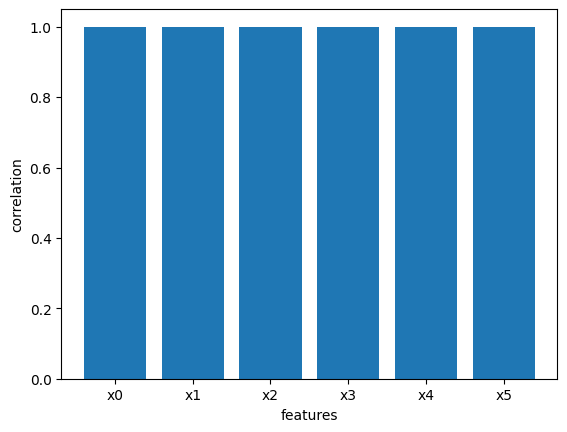

In [49]:
spec_plot = {key: val[0] for key, val in spec_dic_mean_std.items()}
plt.bar([f'x{i}' for i in range(len(spec_plot))], spec_plot.values())
plt.xlabel('features')
plt.ylabel('correlation')

In [50]:
other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])

all_ohe_coef = np.array([models['OneHotEncoder'][i].coef_ for i in range(k)]).squeeze()
all_te_coef = np.array([models['ThermometerEncoder'][i].coef_ for i in range(k)]).squeeze()
# all_te_coef_cumsum = [np.cumsum(all_te_coef[:, other_num+nom_num:], axis=1) for i in [len(val) for val in ordinal_dic.values()]]
all_te_coef_cumsum = []
s=0
for i in [len(val) for val in ordinal_dic.values()]:
    all_te_coef_cumsum.append(np.cumsum(all_te_coef[:, other_num+nom_num+s:other_num+nom_num+s+i], axis=1))
    s+=i
all_te_coef_cumsum = np.concatenate(tuple(all_te_coef_cumsum), axis=1)
all_ie_coef = np.array([models['IntegerEncoder'][i].coef_ for i in range(k)]).squeeze()


all_ohe_coef_mean = np.mean(all_ohe_coef, axis=0)
# all_te_coef_mean = np.array(list(np.mean(all_te_coef, axis=0)[:other_num+nom_num]) + list(np.mean(all_te_coef_cumsum, axis=0)))
all_te_coef_mean = np.mean(np.concatenate((all_te_coef[:, :other_num+nom_num], all_te_coef_cumsum), axis=1), axis=0)
all_ie_coef_mean = np.mean(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_mean[other_num+nom_num:][idx]]*i)*np.linspace(1,i,i))
all_ie_coef_temp = np.concatenate(tuple(all_ie_coef_temp))
all_ie_coef_mean = np.concatenate((all_ie_coef_mean[:other_num+nom_num], all_ie_coef_temp))

# all_ohe_coef_mean = StandardScaler().fit_transform(all_ohe_coef_mean.reshape(-1, 1)).squeeze()
# all_te_coef_mean = StandardScaler().fit_transform(all_te_coef_mean.reshape(-1, 1)).squeeze()
# all_ie_coef_mean = StandardScaler().fit_transform(all_ie_coef_mean.reshape(-1, 1)).squeeze()

all_ohe_coef_std = np.std(all_ohe_coef, axis=0)
all_te_coef_std = np.array(list(np.std(all_te_coef, axis=0)[:other_num+nom_num]) + list(np.std(all_te_coef_cumsum, axis=0)))
all_ie_coef_std = np.std(all_ie_coef, axis=0)
all_ie_coef_temp = []
for idx, i in enumerate([len(val) for val in ordinal_dic.values()]):
    all_ie_coef_temp.append(np.array([all_ie_coef_std[other_num+nom_num:][idx]]*i)*np.array([1]*i))
all_ie_coef_temp = np.concatenate(tuple(all_ie_coef_temp))
all_ie_coef_std = np.concatenate((all_ie_coef_std[:other_num+nom_num], all_ie_coef_temp))

# all_ohe_coef.shape, all_te_coef.shape, all_ie_coef.shape
all_ohe_coef_mean.shape, all_te_coef_mean.shape, all_ie_coef_mean.shape
# all_ohe_coef_std.shape, all_te_coef_std.shape, all_ie_coef_std.shape

((61,), (61,), (61,))

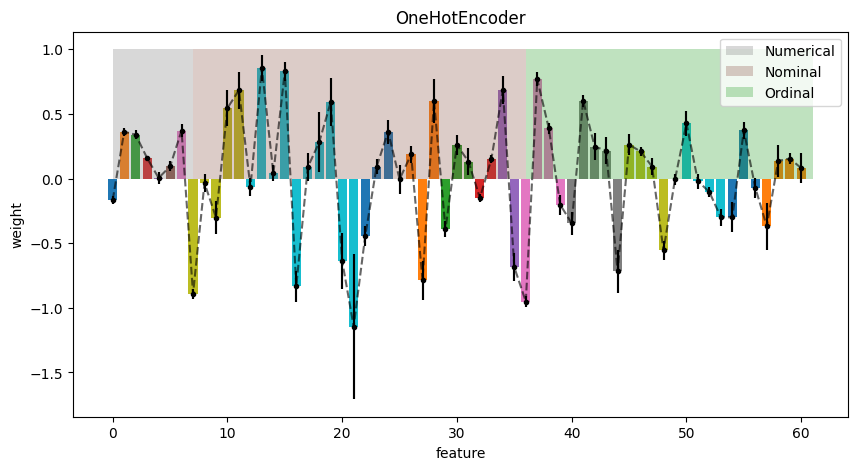

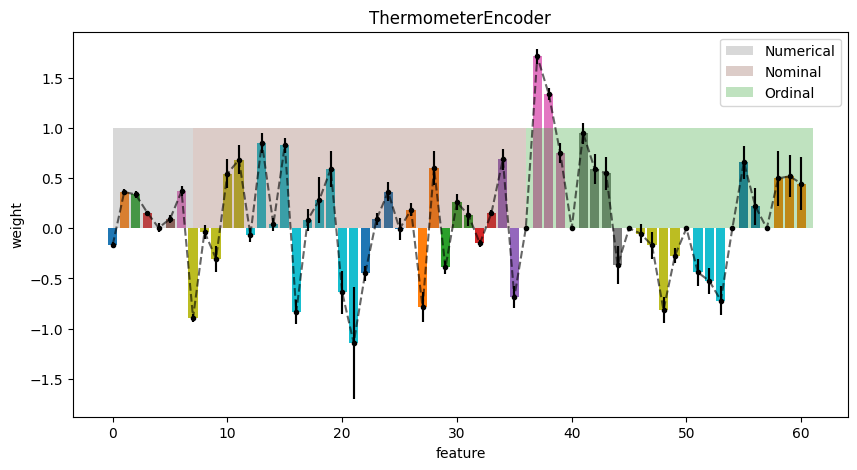

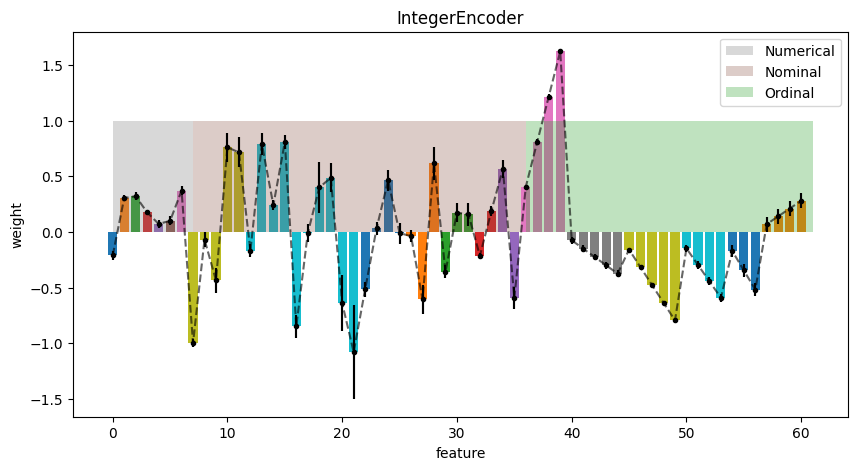

In [51]:
import matplotlib.pyplot as plt
other_num, nom_num, ord_num = len(other_features), sum([len(val) for val in nominal_dic.values()]), sum([len(val) for val in ordinal_dic.values()])
title = ["OneHotEncoder", "ThermometerEncoder", "IntegerEncoder"]
label = ['Numerical', 'Nominal', 'Ordinal']
for idx, (all_mean, all_std) in enumerate(zip([all_ohe_coef_mean, all_te_coef_mean, all_ie_coef_mean], [all_ohe_coef_std, all_te_coef_std, all_ie_coef_std])):
    plt.figure(figsize=(10,5))
    start_1 = 0
    # if idx == 2:
    #     ord_num = len(ordinal_dic.values())
    for idxx, (i, unique_val) in enumerate(zip([other_num, nom_num, ord_num], [[1]*other_num, [len(val) for val in nominal_dic.values()], [len(val) for val in ordinal_dic.values()]])):
        start_2 = 0
        # if idxx == 2 and idx == 2:
        #     unique_val = [1]*i
        for j in unique_val:  
            plt.bar(range(len(all_mean))[start_1+start_2:start_1+start_2+i+j], all_mean[start_1+start_2:start_1+start_2+i+j])
            start_2 += j
        plt.fill_between(x=[start_1, start_1+i] ,y1=[0.0], y2=[1,1],alpha=0.3,label=label[idxx])
        start_1 += i
        
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='.')
    plt.errorbar(range(len(all_mean)), all_mean, all_std, color='black', fmt='--', alpha=0.6)
    plt.title(title[idx])
    plt.ylabel('weight'), plt.xlabel('feature')
    plt.legend()


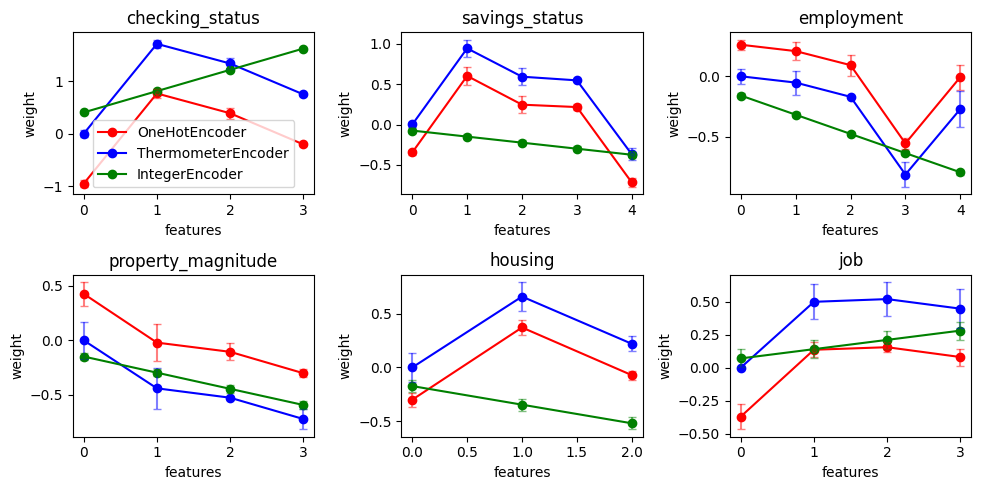

In [53]:
import matplotlib.pyplot as plt
import math
label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']
color = ['r', 'b', 'g']
keys = list(ordinal_dic.keys())
fig, ax = plt.subplots(2, 3, figsize=(10,5))
ax = ax.ravel()
nom_num = sum([len(val) for val in nominal_dic.values()])
ord_num_list = [len(val) for val in ordinal_dic.values()]
# fig.suptitle('ordinal')
start = 0
for i, axe in enumerate(ax):
    cur_len = ord_num_list[i] 
    cur_list = range(cur_len)
    axe.plot(cur_list, all_ohe_coef_mean[other_num+nom_num+start: other_num+nom_num+start+cur_len], label = label[0], color=color[0], marker='o')
    axe.plot(cur_list, all_te_coef_mean[other_num+nom_num+start: other_num+nom_num+start+cur_len], label = label[1], color=color[1], marker='o')
    axe.plot(cur_list, all_ie_coef_mean[other_num+nom_num+start: other_num+nom_num+start+cur_len], label = label[2], color=color[2], marker='o')
    (_,caps1,_) = axe.errorbar(cur_list, all_ohe_coef_mean[other_num+nom_num+start: other_num+nom_num+start+cur_len], all_ohe_coef_std[nom_num+start: nom_num+start+cur_len],alpha = 0.5,color=color[0], fmt='.', capsize = 3)
    (_,caps2,_) = axe.errorbar(cur_list, all_te_coef_mean[other_num+nom_num+start: other_num+nom_num+start+cur_len], all_te_coef_std[nom_num+start: nom_num+start+cur_len],alpha = 0.5, color=color[1], fmt='.', capsize = 3)
    (_,caps3,_) = axe.errorbar(cur_list, all_ie_coef_mean[other_num+nom_num+start: other_num+nom_num+start+cur_len], all_ie_coef_std[other_num+nom_num+start: other_num+nom_num+start+cur_len],alpha = 0.5, color=color[2], fmt='.', capsize = 3)
    for cap in caps1+caps2+caps3:
        cap.set_markeredgewidth(1)
    axe.set_title(keys[i])
    axe.set_ylabel('weight')
    axe.set_xlabel('features')
    start += cur_len
ax[0].legend()     
plt.tight_layout()

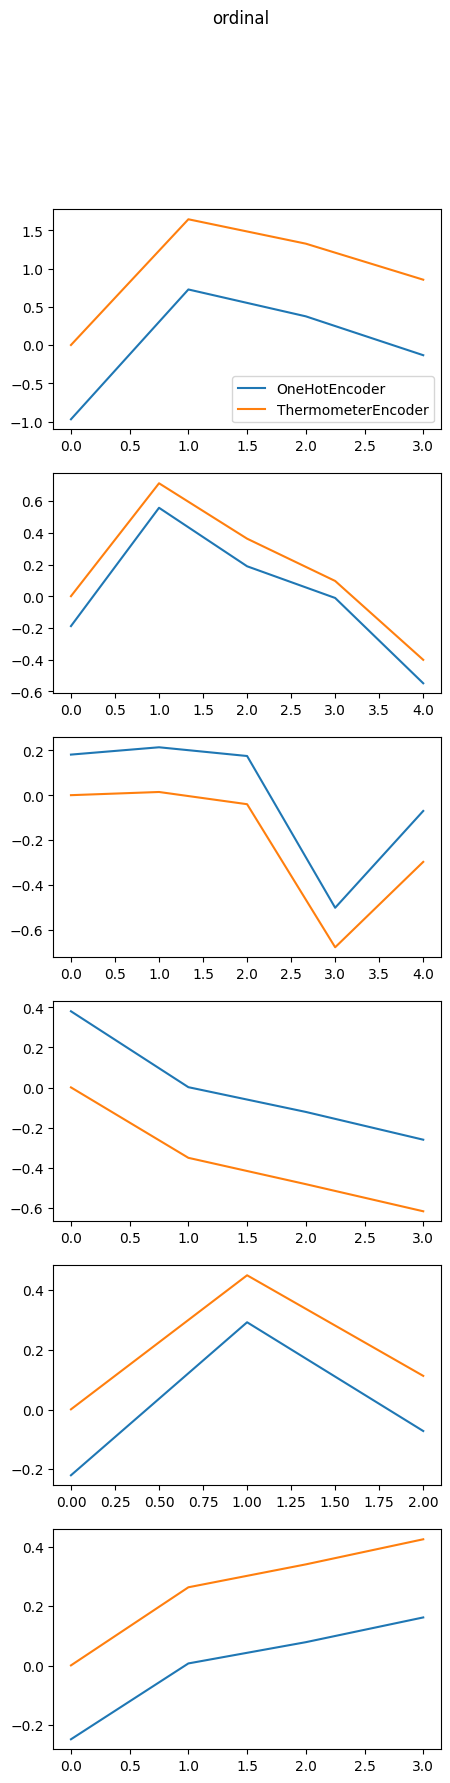

In [20]:
import matplotlib.pyplot as plt

label=['OneHotEncoder', 'ThermometerEncoder', 'IntegerEncoder']

fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,20))
fig.suptitle('ordinal')
for i, (key, val) in enumerate(ord_coef_dic_cum.items()):
    for j in range(len(val)):
        ax[i].plot(range(len(val[j])), val[j], label = label[j])
ax[0].legend()       

# fig, ax = plt.subplots(len(nom_coef_dic.keys()), 1, figsize=(5,10))
# fig.suptitle('nominal')
# for i, (key, val) in enumerate(nom_coef_dic.items()):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]), label = label[j])

# fig = plt.figure(figsize=(5,3))
# fig.suptitle('other')
# plt.plot(range(len(ohe_1.coef_[0][:other_num])), ohe_1.coef_[0][:other_num])
# plt.plot(range(len(te_1.coef_[0][:other_num])), te_1.coef_[0][:other_num])
# plt.plot(range(len(ie_1.coef_[0][:other_num])), ie_1.coef_[0][:other_num])

In [23]:
with open('credit-g-result\credit-g_csv_cv_train.csv','w') as f:
    for df in df_lists:
        f.write(f"{df.columns.name}\n")
        df.to_csv(f)
        f.write("\n")

In [ ]:
# def stringify(dicc, name, categorical=True):
#     dic = dicc.copy()
#     for key, val in dic.items():
#         if categorical: 
#             dic[key] = ['\n'.join([str(v) for v in val]), name]
#         else: 
#             dic[key] = [' '.join([str(v) for v in val]), name]
#     return dic
# dic = {**stringify(other_dic, 'numerical',False), **stringify(nominal_dic, 'nominal'), **stringify(ordinal_dic, 'ordinal')}
# dic_df = pd.DataFrame(dic, index=['attribute values', 'data type'])
# dic_df.T.to_csv('atrr_spec_credit-g.csv')
# dic_df.T.to_excel('atrr_spec_credit-g.xlsx')

In [ ]:
# import matplotlib.pyplot as plt

# wnum = ['w num ohe', 'w num te', 'w num ie']
# wonum = ['wo num ohe', 'wo num te', 'wo num ie']

# fig, ax = plt.subplots(len(ord_coef_dic.keys()), 1, figsize=(5,10))
# fig.suptitle('ordinal')
# for i, (val, val_2) in enumerate(zip(ord_coef_dic.values(), ord_coef_dic_2.values())):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]), label = wnum[j])
#         ax[i].plot(range(len(val_2[j])), np.abs(val_2[j]), label = wonum[j])
# ax[0].legend()

# fig, ax = plt.subplots(len(nom_coef_dic.keys()), 1, figsize=(5,20))
# fig.suptitle('nominal')
# for i, (val, val_2) in enumerate(zip(nom_coef_dic.values(), nom_coef_dic_2.values())):
#     for j in range(len(val)):
#         ax[i].plot(range(len(val[j])), np.abs(val[j]), label = wnum[j])
#         ax[i].plot(range(len(val_2[j])), np.abs(val_2[j]), label = wonum[j])
# ax[0].legend()

# fig = plt.figure(figsize=(5,3))
# fig.suptitle('other')
# plt.plot(range(len(ohe_1.coef_[0][:other_num])), ohe_1.coef_[0][:other_num])
# plt.plot(range(len(te_1.coef_[0][:other_num])), te_1.coef_[0][:other_num])
# plt.plot(range(len(ie_1.coef_[0][:other_num])), ie_1.coef_[0][:other_num])

In [ ]:
# pd.DataFrame(
#     {
#         'UCI German Credit':{
#             'number of instances':1000,
#             'number of features': 21,
#             'number of ordinal features': 6,
#             'prediction task': 'classification'
#         },
#         'Wisconsin Breast Cancer':{
#             'number of instances':699,
#             'number of features': 10,
#             'number of ordinal features': 10,
#             'prediction task': 'classification'
#         },
#         'Default of Credit Clients':{
#             'number of instances':30000,
#             'number of features': 24,
#             'number of ordinal features': 7,
#             'prediction task': 'classification'
#         },
#         "Adult's income":{
#             'number of instances':195665,
#             'number of features': 10,
#             'number of ordinal features': 4,
#             'prediction task': 'regression'
#         }
#     }
# ).to_csv('dataset_characteristic.csv')